In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, Output, HBox
from IPython.display import display, clear_output

%matplotlib inline

*Linear Spline*

In [ ]:
def MAX_LinSpline(f, le, re):
    """
    Compute the maximum of |f(x)-l(f,le,re;x)| on the interval [le,re], 
    where l is a linear function that passes (le, f(le)) and (re, f(re)).
    Here, use ELEVEN points equally spaced between le and re (both inluded)
    to find the maximum
    input:
    f: func, the function to be approximated
    le: float, the left end of interval
    re: float, the right end of interval
    return:
    c: float, where the maximum occurs
    d: float, the maximum
    """
    c = 0
    k = 10  # for 11 equally spaced points
    h = (re - le)/k # calculate h to space the points
    z = np.zeros(k+1)   # create array of 11 points
    for i in range(0, k+1): # loop from 0 to k
        z[i] = f(le + i*h)  # evalualte the points
    for i in range(1, k):   # loop from 1 to k - 1
        z[i]= abs(z[i] - ((i*z[k] + (k - i) * z[0])/k)) # calculate the error at each point
    d = 0
    for i in range(1, k):   # loop from 1 to k - 1
        if z[i] > d:    # find max error
            d = z[i]    # max error
            c = le + i*h    # get x value
    return c, d


f = lambda x: np.sqrt(x)
le = 0
re = 1

max_error_x, max_error_value = MAX_LinSpline(f, le, re)
print(f"Max error occurs at x = {max_error_x}\nMaximum error = {max_error_value}")

Max error occurs at x = 0.30000000000000004
Maximum error = 0.2477225575051662


In [ ]:
def Adaptive_LinSpline(f, a, b, eps, M):
    """
    Perform adaptive linear spline approximation
    input:
    f: func, the function to be approximated
    a: float, left end of the entire interval
    b: float, right end of the entire interval
    eps: float, the tolerance for the stopping criterion
    M: int, perform at most M steps of the algorithm (another stopping criterion)
    return:
    n: int, the number of steps run
    t: 1d numpy array, the knots
    y: 1d numpy array, the function value evaluated at the knots t
    d: 1d numpy array, the collection of maximum absolute difference on each subinterval
    """
    n, i,  = 1, 0
    t = np.zeros(2) # initialize arrays
    y = np.zeros(2)
    c = np.zeros(2)
    d = np.zeros(2)
    t[0], t[1] = a, b   # plug in a and b for t array
    y[0], y[1] = f(t[0]), f(t[1])   # plug in y values in y
    c[1], d[1] = MAX_LinSpline(f, t[0], t[1])   # get maximum error on a and b store in c and d
    for n in range(1, M):   # set loop based on iteration of until M
        i = np.argmax(d)    # get index of maximum error
        if d[i] < eps:  # check if the max error is less than theshold
            break
        t = np.insert(t, i, c[i]) # Insert new x into t
        y = np.insert(y, i, f(c[i])) # Insert new y val into y
        c = np.delete(c, i) # delete inserted x 
        d = np.delete(d, i) # delete used max error
        cval, dval = MAX_LinSpline(f, t[i-1], t[i]) # get max error in new interval 1
        c = np.insert(c, i, cval)   # insert errors and thier x in c and d
        d = np.insert(d, i, dval)
        cval, dval = MAX_LinSpline(f, t[i], t[i+1]) # get max error in new interval 2
        c = np.insert(c, i+1, cval)   # insert errors and thier x in c and d
        d = np.insert(d, i+1, dval)
        
    return n, t, y, d 

f = lambda x: np.sqrt(x)    # create function
le = 0  # set interval left end
re = 1  # set interval right end
eps = 10**(-2)  # set threshold
M = 10  # set amount of iterations
n, t, y, d = Adaptive_LinSpline(f, le, re, eps, M)  # call functions

np.set_printoptions(suppress = True)
print(f"n = {n}\n") # print values
print(f"t = {t}\n")
print(f"y = {y}\n")
print(f"d = {d}\n")

n = 9

t = [0.       0.000729 0.00243  0.0081   0.027    0.09     0.174    0.3
 0.58     1.      ]

y = [0.         0.027      0.04929503 0.09       0.16431677 0.3
 0.41713307 0.54772256 0.76157731 1.        ]

d = [0.         0.00668851 0.00162396 0.00296494 0.00541321 0.00988313
 0.00475151 0.00439864 0.00867502 0.00803079]



t = [0.       0.000729 0.00243  0.0081   0.027    0.09     0.174    0.3
 0.58     1.      ]

y = [0.         0.027      0.04929503 0.09       0.16431677 0.3
 0.41713307 0.54772256 0.76157731 1.        ]



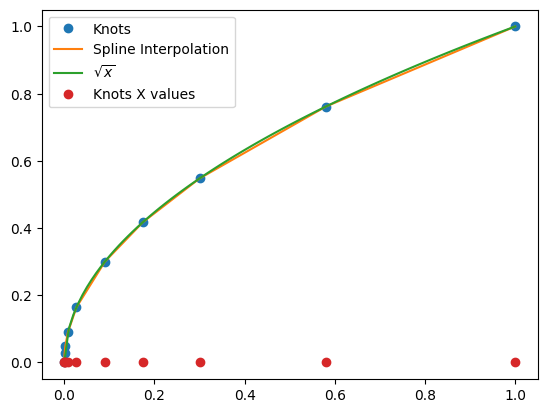

In [ ]:
np.set_printoptions(suppress = True)
print(f"t = {t}\n")
print(f"y = {y}\n")
xaxis = np.linspace(0, 1, 100)  # create the x values in linear space
funct = f(xaxis)    # get values of function
plt.plot(t, y, 'o', label='Knots')   # plot the splin data points x = knots, y = y 
plt.plot(t, y, '-', label='Spline Interpolation')   # plot the splin data points x = knots, y = y 
plt.plot(xaxis, funct, label="$\sqrt{x}$")    # plot f(x)
plt.plot(t, np.zeros(t.size), 'o', label='Knots X values')   # plot the splin data points x = knots, y = y 
plt.legend(loc='upper left')   # show legend in plot

In [ ]:
output = Output()

# Create a function for interactive plotting
def plot_adaptive_spline(M):
    with output:
        clear_output(wait=True)
        n, t, y, d = Adaptive_LinSpline(f, le, re, eps, M)
        
        funct = lambda x: np.sqrt(x)
        xaxis = np.linspace(0, 1, 100)  # create the x values in linear space
        plt.figure(figsize=(10, 6))
        plt.plot(t, y, 'o', label='Knots')   # plot the splin data points x = knots, y = y 
        plt.plot(t, y, '-', label='Spline Interpolation')   # plot the splin data points x = knots, y = y 
        plt.plot(xaxis, funct(xaxis), label="$\sqrt{x}$")    # plot f(x)
        plt.title(f'Adaptive Linear Spline (M = {M})')
        plt.xlabel('Knots')
        plt.ylabel('Function Value')
        plt.legend()
        plt.grid(True)
        plt.show()

# Create an interactive slider widget for M
M_slider = widgets.IntSlider(
    value=M,
    min=1,
    max=10,
    step=1,
    description='M:'
)

# Define an interactive function that updates the plot based on the slider value
def update_plot(change):
    M = change.new
    plot_adaptive_spline(M)

# Link the slider to the update function
M_slider.observe(update_plot, 'value')

# Create and display the interactive widget
display(widgets.VBox([M_slider, output]))

*Cubic Spline*

n = 10

t = [0.     0.0024 0.012  0.0312 0.06   0.0984 0.156  0.3    0.412  0.58
 1.    ]

y = [0.         0.04898979 0.10954451 0.17663522 0.24494897 0.31368774
 0.39496835 0.54772256 0.64187226 0.76157731 1.        ]

d = [0.         0.01143395 0.01398834 0.00822639 0.00415869 0.00187085
 0.00096037 0.0088854  0.00052629 0.00036    0.01178287]



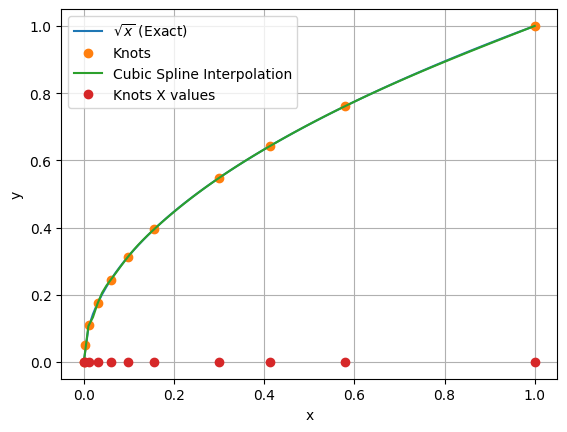

In [ ]:
def CubicNatural(x, y):
    m = x.size
    n = m-1
    a = np.zeros(m)
    b = np.zeros(n)
    c = np.zeros(m)
    d = np.zeros(n)
    for i in range(m):
        a[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]
    u = np.zeros(n)
    u[0] = 0
    for i in range(1, n):
        u[i] = 3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 1
    z[0] = 0
    t[0] = 0
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i]=(u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = 1
    z[m-1] = 0
    c[m-1] = 0
    for i in np.flip(np.arange(n)):
        c[i] = z[i]-t[i]*c[i+1]
        b[i] = (a[i+1]-a[i])/h[i]-h[i]*(c[i+1]+2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    return a, b, c, d

def CubicNaturalEval(w, x, coeff):
    m = x.size
    if w < x[0] or w > x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    a = coeff[0]
    b = coeff[1]
    c = coeff[2]
    d = coeff[3]
    return a[p]+b[p]*(w-x[p])+c[p]*(w-x[p])**2+d[p]*(w-x[p])**3

def MAX_CubicSpline(f, t, coeff, le, re):
    """
    Compute the maximum of |f(x)-l(f,le,re;x)| on the interval [le,re], 
    where l is a cubic spline that passes t, f(t).
    Here, use ELEVEN points equally spaced between le and re (both included)
    to find the maximum.
    input:
    f: func, the function to be approximated
    t: 1d numpy array, the x data coordinates
    coeff: a list of [a,b,c,d], which are obtained from CubicNatural
    le: float, the left end of interval
    re: float, the right end of interval
    return:
    c: float, where the maximum occurs
    d: float, the maximum
    """
    k = 10  # for 11 equally spaced points
    h = (re - le) / k  # calculate h to space the points
    max_diff = 0
    max_x = 0
    
    for i in range(k + 1):
        x = le + i * h
        y_spline = CubicNaturalEval(x, t, coeff)
        y_actual = f(x)
        diff = abs(y_actual - y_spline)
        
        if diff > max_diff:
            max_diff = diff
            max_x = x
    
    return max_x, max_diff

def Adaptive_CubicSpline(f, a, b, eps, M):
    """
    Perform adaptive cubic spline approximation
    input:
    f: func, the function to be approximated
    a: float, left end of the entire interval
    b: float, right end of the entire interval
    eps: float, the tolerance for the stopping criterion
    M: int, perform at most M steps of the algorithm (another stopping criterion)
    return:
    n: int, the number of steps run
    t: 1d numpy array, the knots
    y: 1d numpy array, the function value evaluated at the knots t
    d: 1d numpy array, the collection of maximum absolute difference on each subinterval
    """
    n, i = 1, 0
    t = np.zeros(2)  # initialize arrays
    y = np.zeros(2)
    c = np.zeros(2)
    d = np.zeros(2)
    t[0], t[1] = a, b  # plug in a and b for t array
    y[0], y[1] = f(t[0]), f(t[1])  # plug in y values in y
    c[1], d[1] = MAX_CubicSpline(f, t, CubicNatural(t, y), t[0], t[1])  # get maximum error on a and b store in c and d
    
    while n < M:  # set a loop based on iteration until M
        i = np.argmax(d)  # get index of maximum error
        if d[i] < eps:  # check if the max error is less than threshold
            break
        t = np.insert(t, i, c[i])  # Insert new x into t
        y = np.insert(y, i, f(c[i]))  # Insert new y val into y
        c = np.delete(c, i)  # delete inserted x
        d = np.delete(d, i)  # delete used max error
        cval, dval = MAX_CubicSpline(f, t, CubicNatural(t, y), t[i - 1], t[i])  # get max error in new interval 1
        c = np.insert(c, i, cval)  # insert errors and their x in c and d
        d = np.insert(d, i, dval)
        cval, dval = MAX_CubicSpline(f, t, CubicNatural(t, y), t[i], t[i + 1])  # get max error in new interval 2
        c = np.insert(c, i + 1, cval)  # insert errors and their x in c and d
        d = np.insert(d, i + 1, dval)
        n += 1
        
    return n, t, y, d

# Example usage:
f = lambda x: np.sqrt(x)  # create function
a = 0  # set interval left end
b = 1  # set interval right end
eps = 1e-2  # set threshold
M = 10  # set maximum iterations
n, t, y, d = Adaptive_CubicSpline(f, a, b, eps, M)  # call the functions

np.set_printoptions(suppress=True)
print(f"n = {n}\n")  # print values
print(f"t = {t}\n")
print(f"y = {y}\n")
print(f"d = {d}\n")

# Plot the results
xaxis = np.linspace(a, b, 100)
y_exact = f(xaxis)
y_spline = [CubicNaturalEval(x, t, CubicNatural(t, y)) for x in xaxis]

plt.plot(xaxis, y_exact, label="$\sqrt{x}$ (Exact)")
plt.plot(t, y, 'o', label='Knots')
plt.plot(xaxis, y_spline, label='Cubic Spline Interpolation')
plt.plot(t, np.zeros(t.size), 'o', label='Knots X values')   # plot the splin data points x = knots, y = y 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
output2 = Output()

# Create a function for interactive plotting
def plot_adaptive_spline2(M):
    with output2:
        clear_output(wait=True)
        n, t, y, d = Adaptive_CubicSpline(f, a, b, eps, M)
        funct = lambda x: np.sqrt(x)
        xaxis = np.linspace(0, 1, 100)  # create the x values in linear space
        y_exact = funct(xaxis)
        y_spline = [CubicNaturalEval(x, t, CubicNatural(t, y)) for x in xaxis]
        
        funct = lambda x: np.sqrt(x)
        plt.figure(figsize=(10, 6))
        plt.plot(xaxis, y_spline, label='Cubic Spline Interpolation')
        plt.plot(t, y, 'o', label='Knots')
        plt.plot(xaxis, y_exact, label="$\sqrt{x}$")    # plot f(x)
        plt.title(f'Adaptive Cubic Spline (M = {M})')
        plt.xlabel('Knots')
        plt.ylabel('Function Value')
        plt.legend()
        plt.grid(True)
        plt.show()

# Create an interactive slider widget for M
M_slider2 = widgets.IntSlider(
    value=M,
    min=1,
    max=10,
    step=1,
    description='M:'
)

# Define an interactive function that updates the plot based on the slider value
def update_plot2(change):
    M = change.new
    plot_adaptive_spline2(M)

# Link the slider to the update function
M_slider2.observe(update_plot2, 'value')

# Create and display the interactive widget
display(widgets.VBox([M_slider2, output2]))